In [1]:
import numpy as np
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
from datetime import timezone, timedelta
from scipy.signal import argrelextrema
from itertools import product
import pandas as pd
import seaborn as sns

In [2]:
log_fname = "/home/sparrow/soft/transloc/log.tsv"

In [4]:
log = pd.read_csv(log_fname,sep="\t",names=["sid","vid","timestamp","dist"])
print(len(log))

259393


In [5]:
format = '%I:%M%p'

broadway_times_weekday = ["6:00am","6:15am","6:30am","6:45am","7:00am","7:15am","7:30am","7:36am","7:42am",
                          "7:48am","7:54am","8:00am","8:06am","8:12am","8:18am","8:24am","8:30am","8:36am",
                          "8:42am","8:48am","8:54am","9:00am","9:10am","9:20am","9:30am","9:40am","9:50am",
                          "10:00am","10:15am","10:30am","10:45am","11:00am","11:15am","11:30am","11:45am",
                          "12:00pm","12:15pm","12:30pm","12:45pm","1:00pm","1:15pm","1:30pm","1:45pm","2:00pm",
                          "2:15pm","2:30pm","2:45pm","3:00pm","3:06pm","3:12pm","3:18pm","3:24pm","3:30pm",
                          "3:36pm","3:42pm","3:48pm","3:54pm","4:00pm","4:06pm","4:12pm","4:18pm","4:24pm",
                          "4:30pm","4:36pm","4:42pm","4:48pm","4:54pm","5:00pm","5:06pm","5:12pm","5:18pm",
                          "5:24pm","5:30pm","5:36pm","5:42pm","5:48pm","5:54pm","6:00pm","6:10pm","6:20pm",
                          "6:30pm","6:45pm","7:00pm","7:15pm","7:30pm","7:45pm","8:00pm","8:15pm","8:30pm",
                          "9:00pm","9:30pm","10:00pm","10:30pm","11:00pm","11:30pm","12:00am","12:30am"]
interfaith_times_weekday = ["6:00am","6:15am","6:30am","6:45am","7:00am","7:15am","7:30am","7:36am","7:42am",
                            "7:48am","7:54am","8:00am","8:06am","8:12am","8:18am","8:24am","8:30am","8:36am",
                            "8:42am","8:48am","8:54am","9:00am","9:06am","9:12am","9:18am","9:24am","9:30am",
                            "9:40am","9:50am","10:00am","10:10am","10:20am","10:30am","10:45am","11:00am",
                            "11:15am","11:30am","11:45am","12:00pm","12:15pm","12:30pm","12:45pm","1:00pm",
                            "1:15pm","1:30pm","1:45pm","2:00pm","2:15pm","2:30pm","2:45pm","3:00pm","3:15pm",
                            "3:30pm","3:36pm","3:42pm","3:48pm","3:54pm","4:00pm","4:06pm","4:12pm","4:18pm",
                            "4:24pm","4:30pm","4:36pm","4:42pm","4:48pm","4:54pm","5:00pm","5:06pm","5:12pm",
                            "5:18pm","5:24pm","5:30pm","5:36pm","5:42pm","5:48pm","5:54pm","6:00pm","6:10pm",
                            "6:20pm","6:30pm","6:40pm","6:50pm","7:00pm","7:15pm","7:30pm","7:45pm","8:00pm",
                            "8:15pm","8:30pm","8:45pm","9:00pm","9:30pm","10:00pm","10:30pm","11:00pm","11:30pm",
                            "12:00am","12:30am"]
times_sat = ["7:25am","7:50am","8:15am","8:40am","9:05am","9:30am","9:55am","10:20am","10:45am","11:10am",
             "11:35am","12:00pm","12:25pm","12:50pm","1:15pm","1:40pm","2:05pm","2:30pm","2:55pm","3:20pm",
             "3:45pm","4:10pm","4:35pm","5:00pm","5:25pm","5:50pm","6:15pm","6:40pm","7:05pm","7:30pm",
             "7:55pm","8:20pm","8:45pm","9:10pm","9:35pm","10:00pm","10:25pm","10:50pm","11:15pm","11:40pm",
             "12:05am","12:30am"]
times_sun = ["11:10am","11:35am","12:00pm","12:25pm","12:50pm","1:15pm","1:40pm","2:05pm","2:30pm","2:55pm",
             "3:20pm","3:45pm","4:10pm","4:35pm","5:00pm","5:25pm","5:50pm","6:15pm","6:40pm","7:05pm",
             "7:30pm","7:55pm","8:20pm","8:45pm","9:10pm","9:35pm","10:00pm","10:25pm","10:50pm","11:15pm",
             "11:40pm"]

In [6]:
n=100
max_time_diff = 1200000 # 20 minutes in unix time
min_max_distance_between_stops = 3500 # distance between the two stops
min_distance_to_stop = 250

name2sid = {"Broadway":4177254,
            "Interfaith":4265754}

stops = {4177254:{"name":"Broadway",
                  "times":{"weekday":[datetime.time(datetime.strptime(x,format)) for x in broadway_times_weekday],
                           "sat":[datetime.time(datetime.strptime(x,format)) for x in times_sat],
                           "sun":[datetime.time(datetime.strptime(x,format)) for x in times_sun]}},
         4265754:{"name":"Interfaith",
                  "times":{"weekday":[datetime.time(datetime.strptime(x,format)) for x in interfaith_times_weekday],
                           "sat":[datetime.time(datetime.strptime(x,format)) for x in times_sat],
                           "sun":[datetime.time(datetime.strptime(x,format)) for x in times_sun]}}}

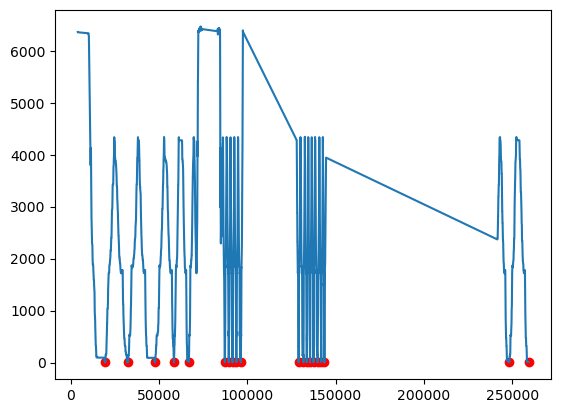

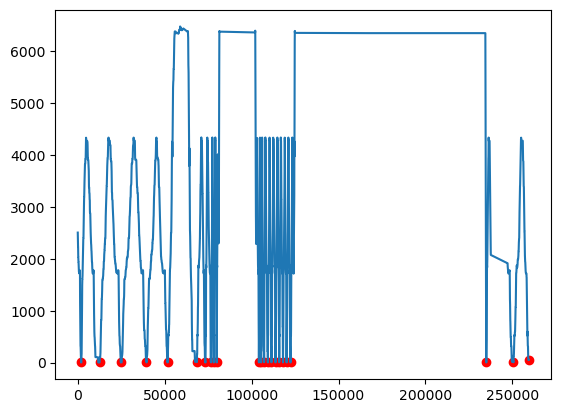

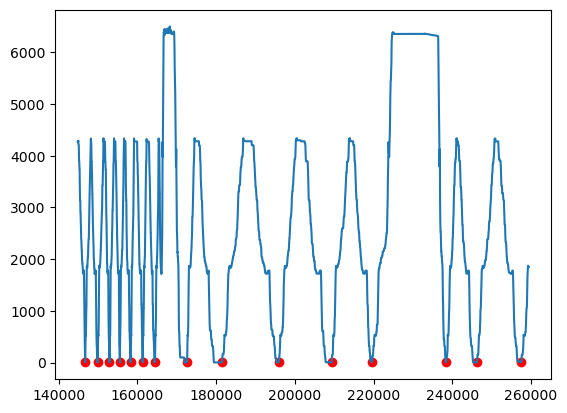

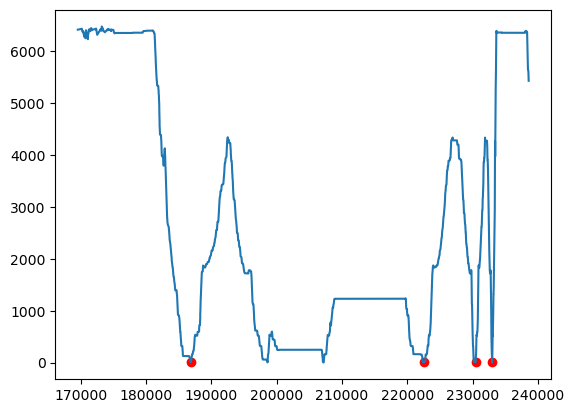

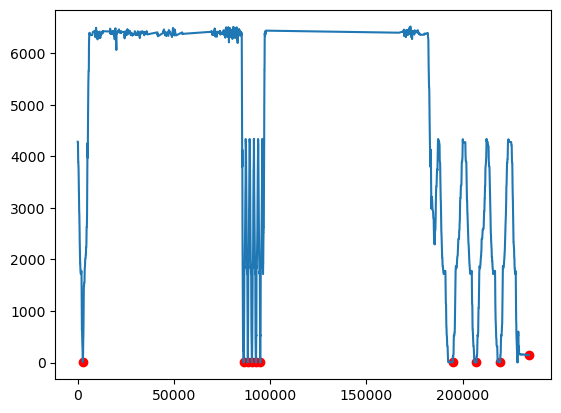

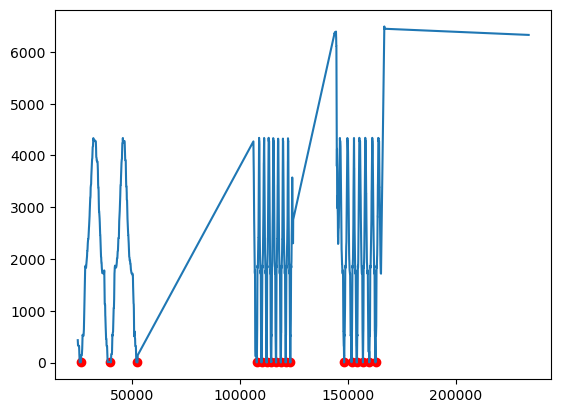

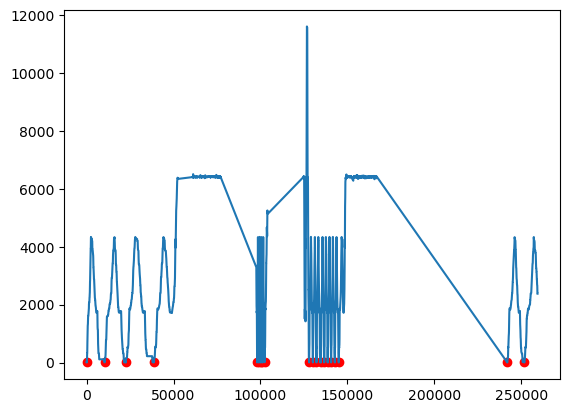

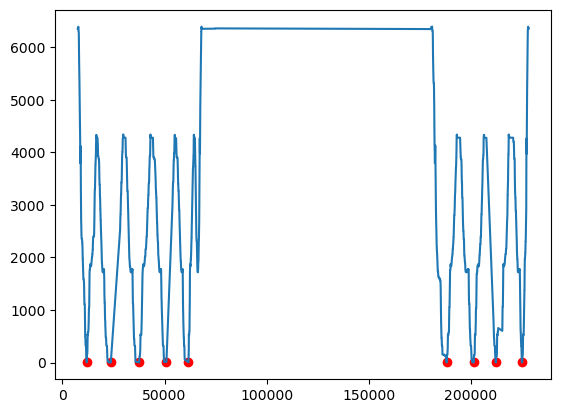

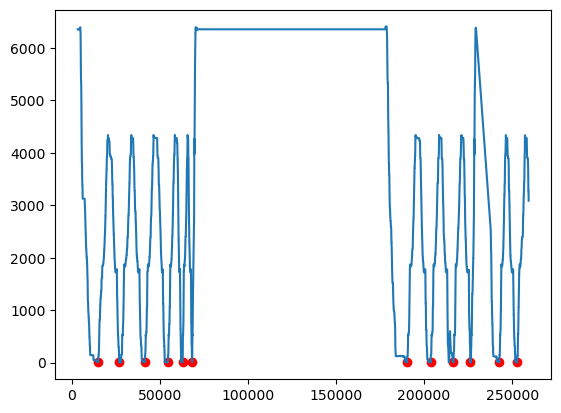

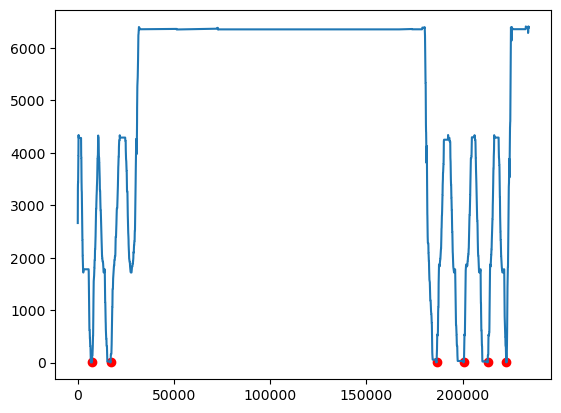

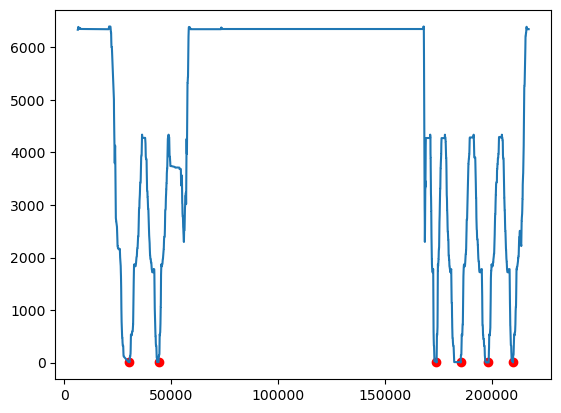

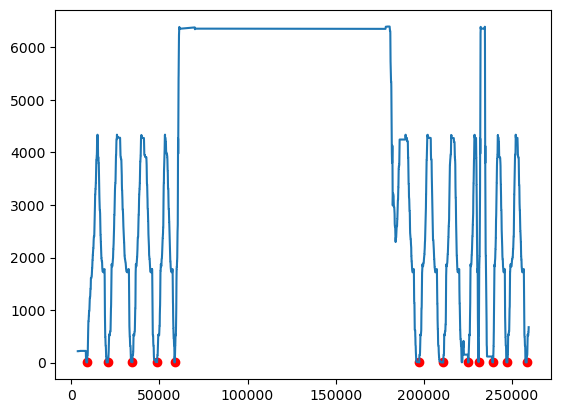

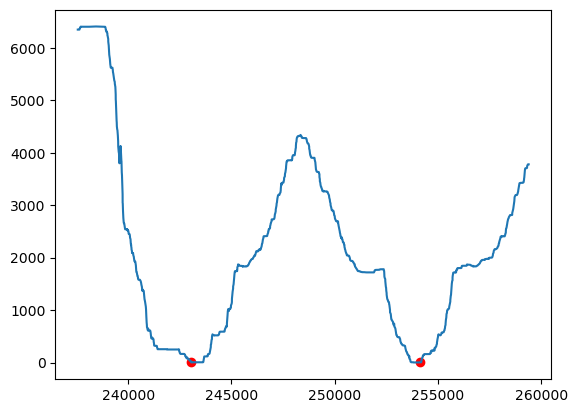

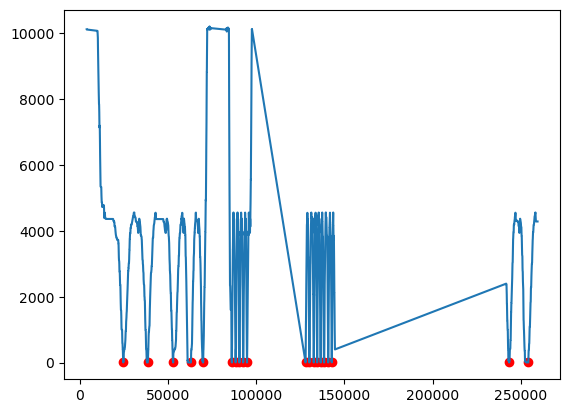

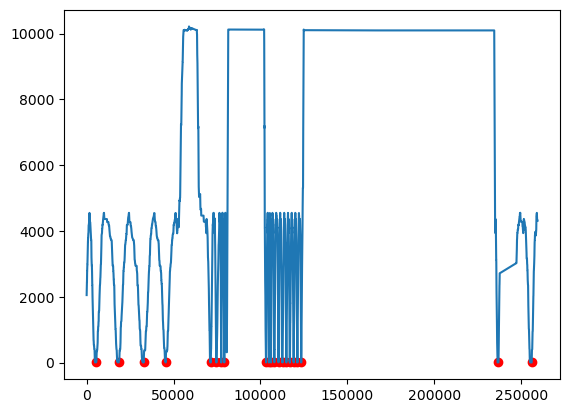

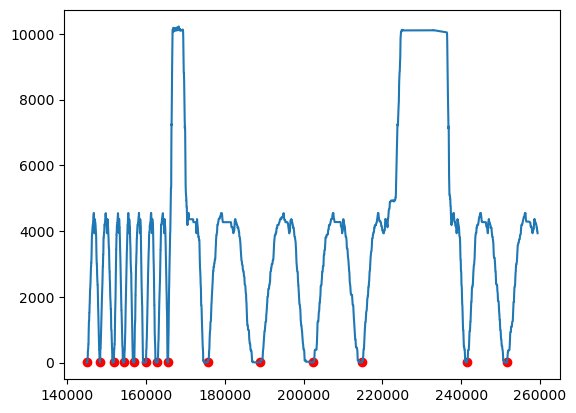

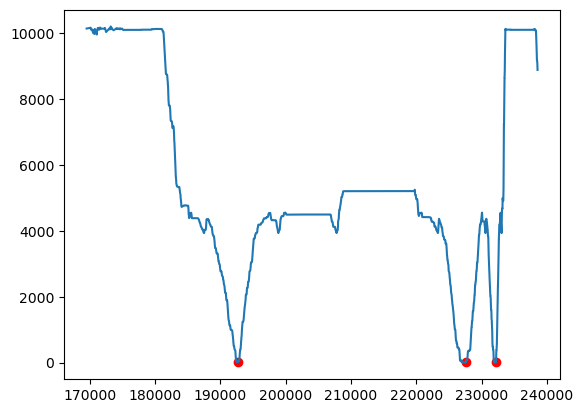

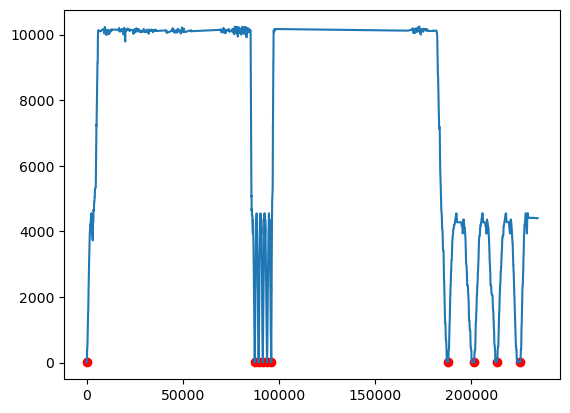

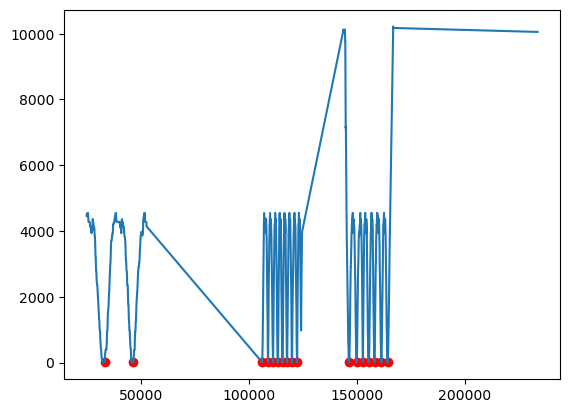

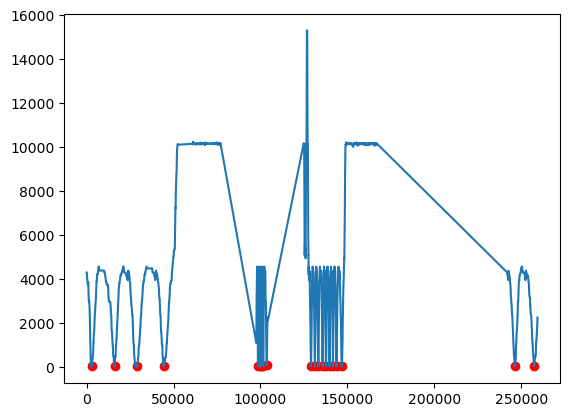

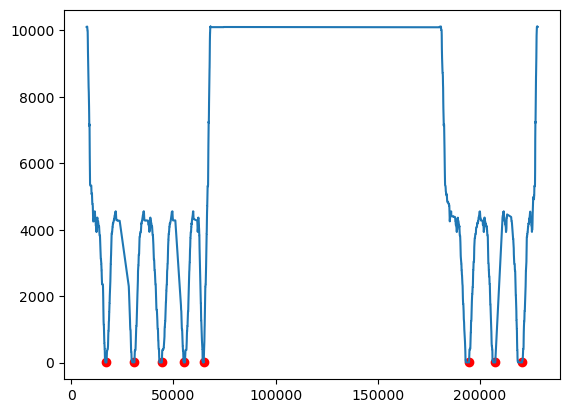

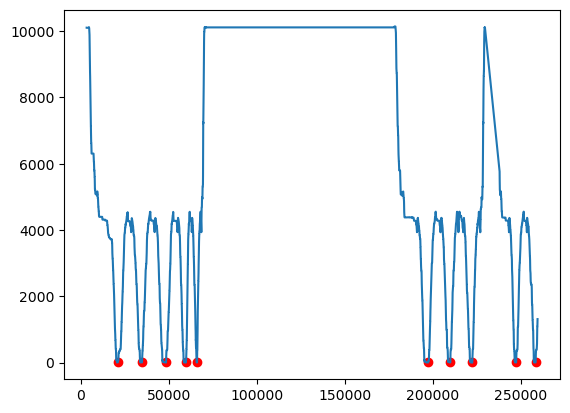

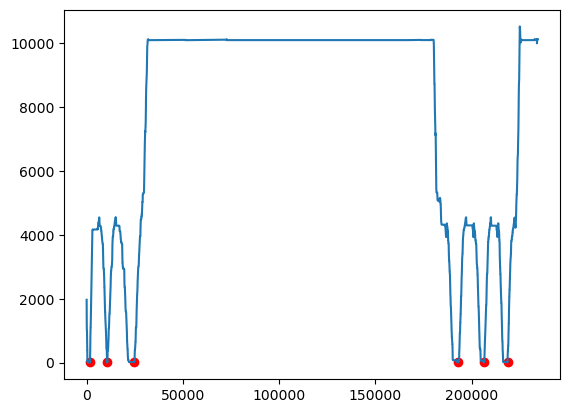

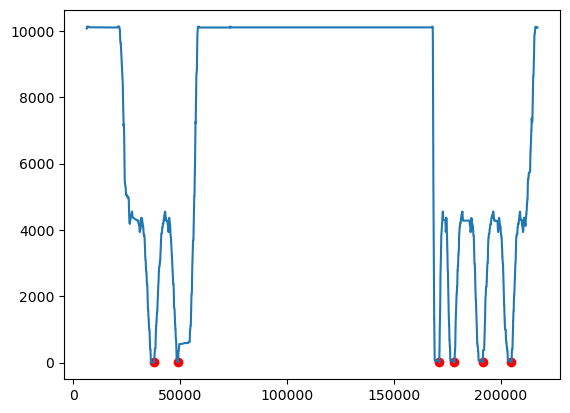

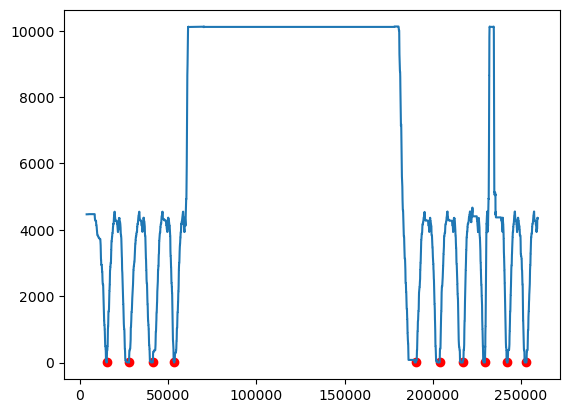

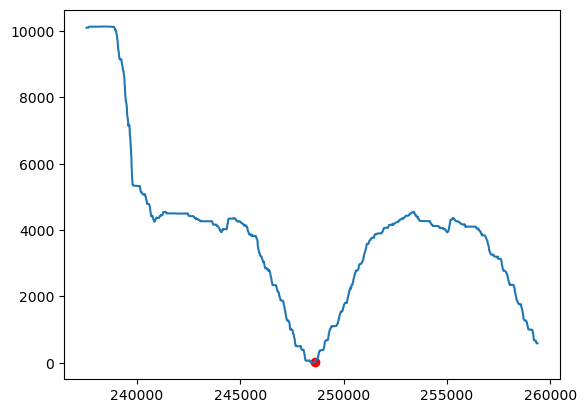

In [7]:
days = dict()

glog = log.groupby(by=["sid","vid"])
grp = ""
for name,grp in glog:
    # Find local peaks
#     grp['min'] = grp.dist[(grp.dist.shift(1) > grp.dist) & (grp.dist.shift(-1) > grp.dist) & (grp.dist<=100)]
    
    grp['min'] = grp.iloc[argrelextrema(grp.dist.values, np.less_equal,
                    order=n)[0]]['dist']
    grp["min"] = grp[~(grp["min"].isna())&(grp["min"]<min_distance_to_stop)]["min"]
    
    
    # remove duplicates close in time
    sub = grp[~(grp["min"].isna())].reset_index(drop=True)

    sub["group_diff"] = sub.sort_values("timestamp")["timestamp"]\
                         .diff()\
                         .gt(max_time_diff)\
                         .cumsum()

    sub_grp_diff = pd.DataFrame(sub.groupby(by="group_diff").max()).reset_index()
    grp["min"] = grp[~(grp["min"].isna())&(grp["timestamp"].isin(sub_grp_diff["timestamp"]))]["min"]
    
    
    # we probably should also make sure that the bus actually went somewhere meaningful 
    # and not just circled around without passengers
    
    # can be done as:
    # compute distance between the two endpoints
    # get maximum distance between two inferred stops
    # if not within n% of the total route distance
    
    idxs = list(grp[~(grp["min"].isna())].index)
    
    good_idxs = []
    
    if len(idxs)>=1:
        good_idxs.append(idxs[0])

    if len(idxs)>1:
        for i in idxs[1:]:
            max_dist_between = grp.loc[good_idxs[-1]:i]["dist"].max()
            if max_dist_between<=min_max_distance_between_stops:
                good_idxs[-1] = i
            else:
                good_idxs.append(i)
                
    grp["min"] = grp[~(grp["min"].isna())&(grp.index.isin(good_idxs))]["min"]
    grp["time"] = pd.to_datetime(grp[~(grp["min"].isna())]["timestamp"],unit='ms',utc=True).dt.tz_convert("US/Eastern")
        
    plt.scatter(grp.index, grp['min'], c='r')
    grp.dist.plot()
    plt.show()
    
    # add times
    for t in list(grp[~(grp["min"].isna())]["time"]):
        if t.date() not in days:
            if t.weekday() <= 4: # weekday
                days[t.date()] = {name2sid["Broadway"]:{"scheduled":[x for x in stops[name2sid["Broadway"]]["times"]["weekday"]],
                                                        "observed":[]},
                                  name2sid["Interfaith"]:{"scheduled":[x for x in stops[name2sid["Interfaith"]]["times"]["weekday"]],
                                                          "observed":[]}}
            else:
                if t.weekday() == 5: # Saturday
                    days[t.date()] = {name2sid["Broadway"]:{"scheduled":[x for x in stops[name2sid["Broadway"]]["times"]["sat"]],
                                                            "observed":[]},
                                      name2sid["Interfaith"]:{"scheduled":[x for x in stops[name2sid["Interfaith"]]["times"]["sat"]],
                                                              "observed":[]}}
                if t.weekday() == 6: # Sunday
                    days[t.date()] = {name2sid["Broadway"]:{"scheduled":[x for x in stops[name2sid["Broadway"]]["times"]["sun"]],
                                                            "observed":[]},
                                      name2sid["Interfaith"]:{"scheduled":[x for x in stops[name2sid["Interfaith"]]["times"]["sun"]],
                                                              "observed":[]}}

        # add days
        days[t.date()][name[0]]["observed"].append(t.time())

In [8]:
# recursive function to find closest times
# 1. find the closest pair from the two lists that meets criteria
# 2. return list without the two timepoints

def get_delta(t1,t2):
    ct1 = datetime.combine(date.today(),t1)
    ct2 = datetime.combine(date.today(),t2)
    td = (ct1-ct2).total_seconds()
    return td
    
def _closest(l1,l2,res,max_delta):
    if len(l1)==0 or len(l2)==0:
        return res
    cl = min(product(l1, l2), key=lambda t: abs(get_delta(t[0],t[1])))
    if abs(get_delta(cl[0],cl[1]))>max_delta:
        for x in l1:
            res.append((x,0))
        return res
    
    else:
        res.append(cl)
        t1 = [x for x in l1]
        t1.remove(cl[0])
        t2 = [x for x in l2]
        t2.remove(cl[1])
        _closest(t1,t2,res,max_delta)
        
    
def print_res(res):
    for r in res:
        try:
            print(r[0].strftime(format),r[1].strftime(format))
        except:
            print(r[0].strftime(format),None)
    
    
# now for each day and stop we need to couple datapoints and get some data out:
# 1. number missed
# 2. total time off from the schedule
for day,v in days.items():
    for sid,v2 in v.items():
        print(day,stops[sid]["name"])
        # couple times
        res = []
        _closest(v2["scheduled"],v2["observed"],res,600)
        print_res(sorted(res))

2022-11-11 Broadway
12:00AM None
12:30AM None
06:00AM None
06:15AM None
06:30AM None
06:45AM None
07:00AM None
07:15AM None
07:30AM None
07:36AM None
07:42AM None
07:48AM None
07:54AM None
08:00AM None
08:06AM None
08:12AM None
08:18AM None
08:24AM None
08:30AM None
08:36AM None
08:42AM None
08:48AM None
08:54AM None
09:00AM None
09:10AM None
09:20AM None
09:30AM None
09:40AM None
09:50AM None
10:00AM None
10:15AM None
10:30AM None
10:45AM None
11:00AM None
11:15AM None
11:30AM None
11:45AM None
12:00PM None
12:15PM None
12:30PM None
12:45PM None
01:00PM None
01:15PM None
01:30PM None
01:45PM None
02:00PM 02:00PM
02:15PM 02:19PM
02:30PM 02:25PM
02:45PM None
03:00PM 02:57PM
03:06PM 03:07PM
03:12PM 03:14PM
03:18PM 03:21PM
03:24PM 03:25PM
03:30PM None
03:36PM 03:36PM
03:42PM None
03:48PM 03:47PM
03:54PM None
04:00PM 04:01PM
04:06PM 04:06PM
04:12PM 04:13PM
04:18PM 04:18PM
04:24PM 04:25PM
04:30PM 04:30PM
04:36PM 04:33PM
04:42PM None
04:48PM 04:48PM
04:54PM 04:55PM
05:00PM None
05:06PM 05:06

In [9]:
fs2d = '%Y-%m-%d %H:%M'
start_time = "2022-11-14 11:45"
end_time = "2022-11-14 14:50"
sid = name2sid["Interfaith"]

start_time = pd.to_datetime(datetime.strptime(start_time,fs2d)).tz_localize("US/Eastern")
end_time = pd.to_datetime(datetime.strptime(end_time,fs2d)).tz_localize("US/Eastern")

log["time"] = pd.to_datetime(log["timestamp"],unit='ms',utc=True).dt.tz_convert("US/Eastern")

slog = log[(log["time"]>start_time)&(log["time"]<end_time)&(log["sid"]==sid)].reset_index(drop=True)
slog

,sid,vid,timestamp,dist,time
0,4265754,4019377,1668444302000,4350.808132,2022-11-14 11:45:02-05:00
1,4265754,4019319,1668444302000,2009.752586,2022-11-14 11:45:02-05:00
2,4265754,4019377,1668444306000,4365.340860,2022-11-14 11:45:06-05:00
3,4265754,4019319,1668444306000,2002.730627,2022-11-14 11:45:06-05:00
4,4265754,4019377,1668444308000,4379.873752,2022-11-14 11:45:08-05:00
...,...,...,...,...,...
2914,4265754,4019377,1668455388000,4375.455906,2022-11-14 14:49:48-05:00
2915,4265754,4019315,1668455388000,1240.911416,2022-11-14 14:49:48-05:00
2916,4265754,4019317,1668455388000,4978.412254,2022-11-14 14:49:48-05:00
2917,4265754,4019377,1668455392000,4375.455906,2022-11-14 14:49:52-05:00


In [10]:
# need a way to plot what was happenning in a given time interval at a given stop

data2plot = pd.DataFrame([])

glog = slog.groupby(by=["sid","vid"])
for name,grp in glog:
    # Find local peaks
    
    grp['min'] = grp.iloc[argrelextrema(grp.dist.values, np.less_equal,
                    order=n)[0]]['dist']
    grp["min"] = grp[~(grp["min"].isna())&(grp["min"]<min_distance_to_stop)]["min"]
    
    
    # remove duplicates close in time
    sub = grp[~(grp["min"].isna())].reset_index(drop=True)

    sub["group_diff"] = sub.sort_values("timestamp")["timestamp"]\
                         .diff()\
                         .gt(max_time_diff)\
                         .cumsum()

    sub_grp_diff = pd.DataFrame(sub.groupby(by="group_diff").max()).reset_index()
    grp["min"] = grp[~(grp["min"].isna())&(grp["timestamp"].isin(sub_grp_diff["timestamp"]))]["min"]
    
    
    # we probably should also make sure that the bus actually went somewhere meaningful 
    # and not just circled around without passengers
    
    # can be done as:
    # compute distance between the two endpoints
    # get maximum distance between two inferred stops
    # if not within n% of the total route distance
    
    idxs = list(grp[~(grp["min"].isna())].index)
    
    good_idxs = []
    
    if len(idxs)>=1:
        good_idxs.append(idxs[0])

    if len(idxs)>1:
        for i in idxs[1:]:
            max_dist_between = grp.loc[good_idxs[-1]:i]["dist"].max()
            if max_dist_between<=min_max_distance_between_stops:
                good_idxs[-1] = i
            else:
                good_idxs.append(i)
                
    grp["min"] = grp[~(grp["min"].isna())&(grp.index.isin(good_idxs))]["min"]
    
    data2plot = pd.concat([data2plot,grp[["vid","time","dist","min"]]])

data2plot

,vid,time,dist,min
1745,4019315,2022-11-14 14:12:07-05:00,4269.356593,NaN
1748,4019315,2022-11-14 14:12:14-05:00,4269.356593,NaN
1752,4019315,2022-11-14 14:12:17-05:00,4269.356593,NaN
1761,4019315,2022-11-14 14:12:44-05:00,4269.356593,NaN
1773,4019315,2022-11-14 14:13:15-05:00,4269.356593,NaN
...,...,...,...,...
2910,4019377,2022-11-14 14:49:42-05:00,4375.455906,NaN
2912,4019377,2022-11-14 14:49:46-05:00,4375.455906,NaN
2914,4019377,2022-11-14 14:49:48-05:00,4375.455906,NaN
2917,4019377,2022-11-14 14:49:52-05:00,4375.455906,NaN


(array([19310.70833333, 19310.72916667, 19310.75      , 19310.77083333,
        19310.79166667, 19310.8125    ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

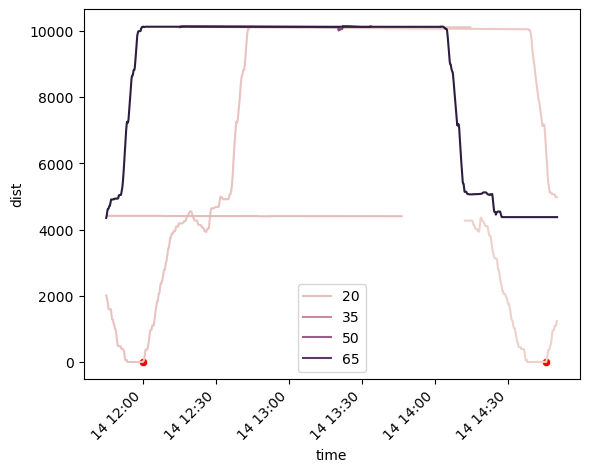

In [11]:
sns.lineplot(data=data2plot,x="time",y="dist",hue="vid")
sns.scatterplot(data=data2plot,x="time",y="min",color="r")
plt.xticks(rotation=45, ha='right')